In [2]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt

### SVM с ядром

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Для того, чтобы сравнить линейный SVM и SVM с ядром RBF и визуально отобразить различия, оставим два класса и первые два признака

In [4]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]

y_2d = y[y > 0]
y_2d -= 1

In [5]:
C_range = np.logspace(-2, 10, 13)
param_grid = dict(C=C_range)

In [6]:
Strat = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
reg_grid = GridSearchCV(LinearSVC(random_state=42),
                        param_grid=param_grid,
                        cv=Strat
                        )
model_grid = reg_grid.fit(X, y)

In [7]:
print(model_grid.best_score_)
print(model_grid.best_params_)

0.9600000000000002
{'C': 1000.0}


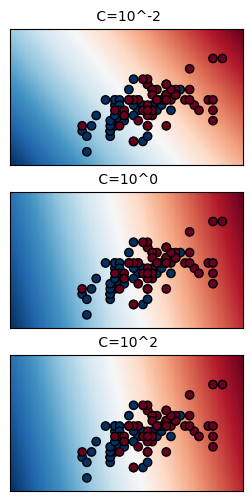

In [8]:
C_2d_range = [1e-2, 1, 1e2]
classifiers = []
for C in C_2d_range:
    clf = LinearSVC(C=C)
    clf.fit(X_2d, y_2d)
    classifiers.append((C, clf))
    
    
plt.figure(figsize=(3, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), 1, k + 1)
    plt.title(" C=10^%d" % (np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

In [9]:
clf = SVC(random_state=42)

In [10]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(C=C_range, gamma=gamma_range)

reg_grid = GridSearchCV(clf,
                        param_grid=param_grid,
                        cv=Strat
                        )
model_grid = reg_grid.fit(X, y)

In [11]:
print(model_grid.best_score_)
print(model_grid.best_params_)

0.9666666666666668
{'C': 1.0, 'gamma': 0.1}


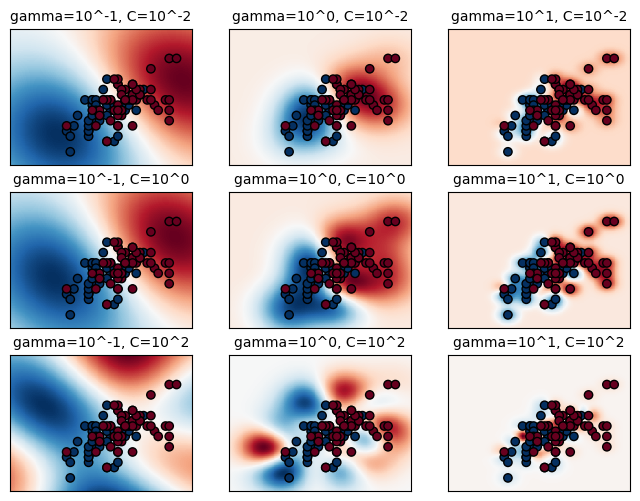

In [12]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# Визуализация
# рисуем визуализацию эффектов параметров

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # оценим функцию принятия решения в сетке
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # визуализируем функцию принятия решения для этих параметров
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # визуализируем влияние параметра на функцию принятия решения
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")